In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,  OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler,  OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV , RepeatedKFold#GridSearch is for hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate


In [2]:
# import dataset
train_data = pd.read_csv('https://raw.githubusercontent.com/DaisyYuan810/schulich_data_science/main/train.csv')

In [3]:
# check dataset
train_data.head()
train_data.describe()
train_data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [4]:
# Drop columns 
clean_data = train_data.drop(columns=['Unnamed: 0', 'id'])

In [5]:
# Checking Null Values
clean_data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

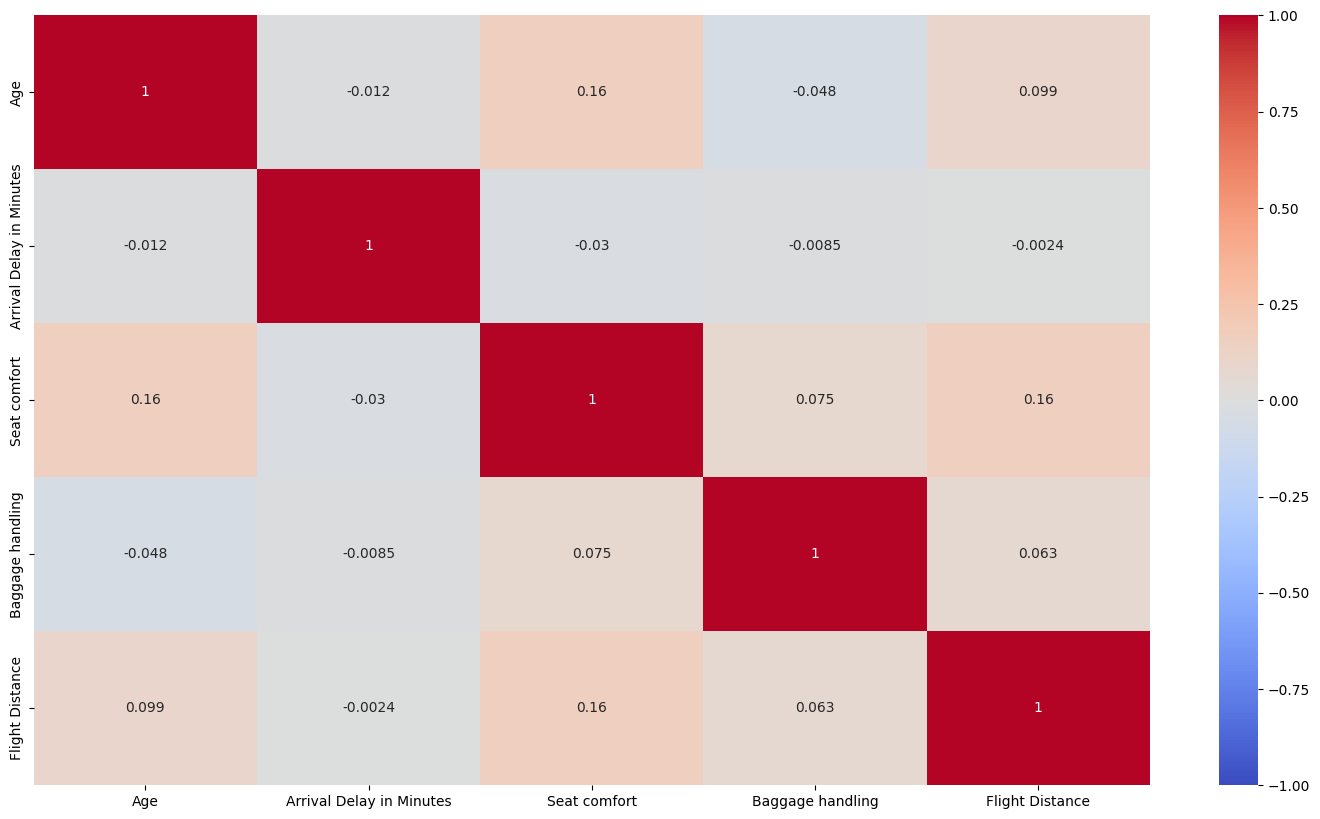

In [6]:
# Set the variables that we want to check the correlations
var = ['Age', 'Arrival Delay in Minutes', 'Seat comfort', 'Baggage handling', 'Flight Distance']

# Assuming 'df' is your DataFrame containing these variables
# Select only the columns of interest
df_selected = clean_data[var]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Set the figure size for the heatmap (correlation matrix)
plt.figure(figsize=(18, 10))

# Create the heatmap (only for numerical numbers)
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')

# Display the plot
plt.show()


In [ ]:
sns.pairplot(df, hue='Outcome')

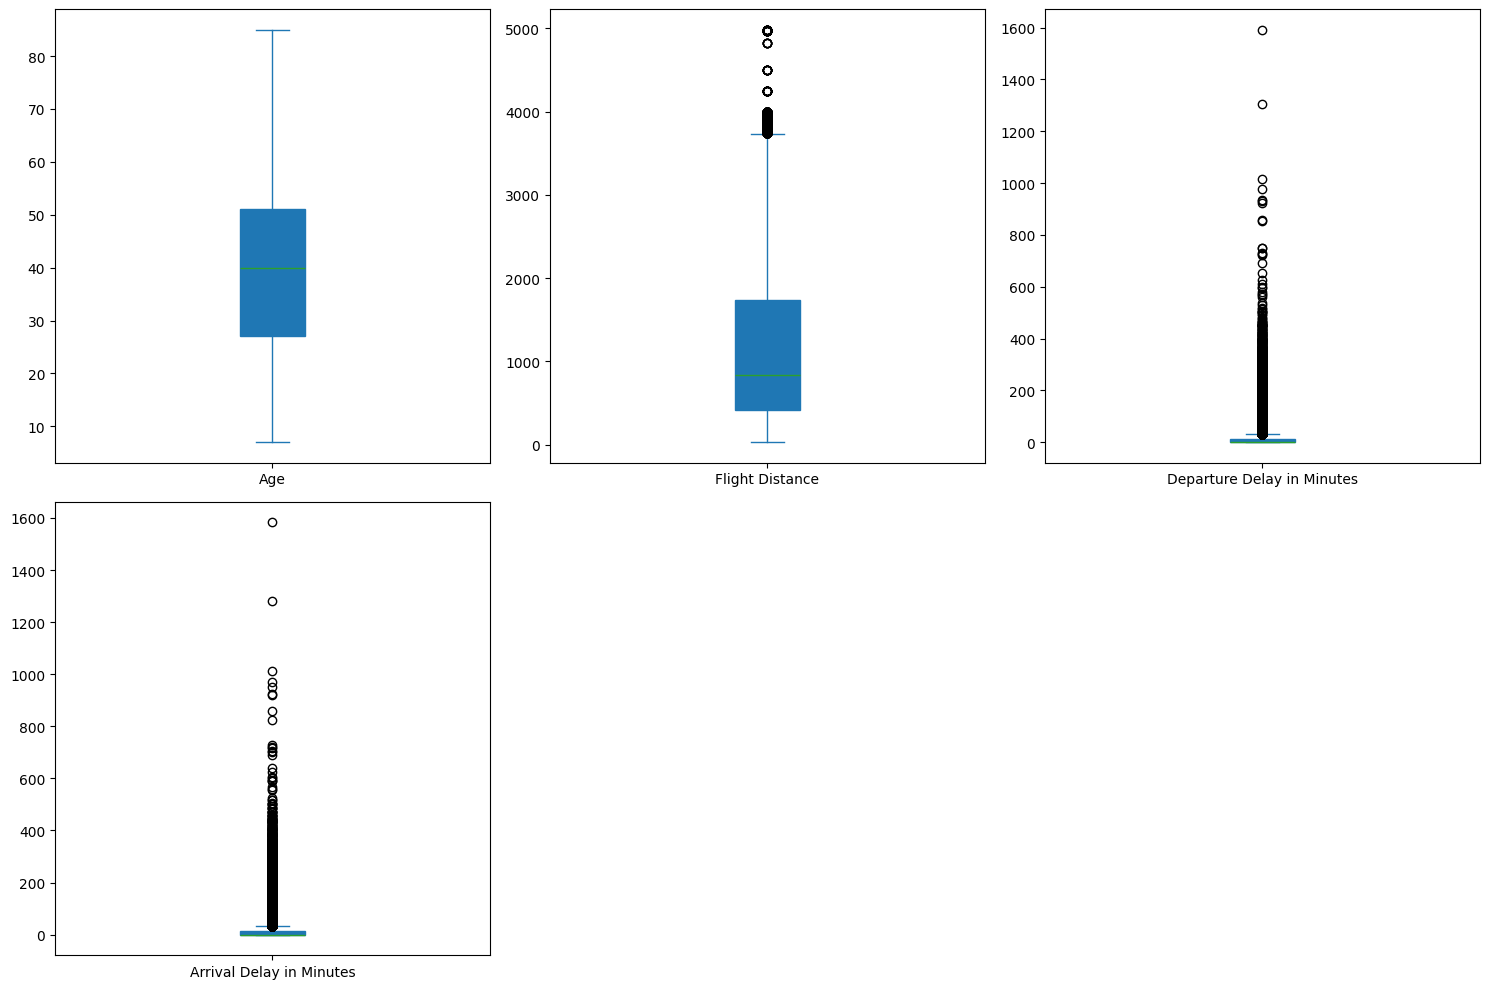

In [7]:
## several Boxplot in one graph
# List of variables of interest
variables_of_interest = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Create boxplots for each specified variable
clean_data[variables_of_interest].plot(kind="box", subplots=True, layout=(2, 3), figsize=(15, 10), patch_artist=True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

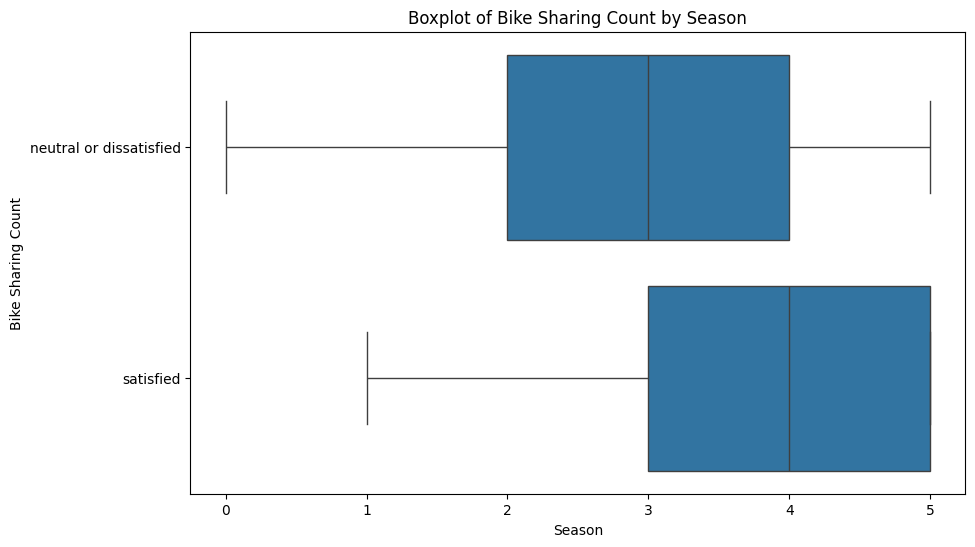

In [8]:
# Boxplot for categorical number, x is categorical number, y is the count of number of each x
plt.figure(figsize=(10, 6))
sns.boxplot(x='Checkin service', y='satisfaction', data=clean_data)
plt.title('Boxplot of Bike Sharing Count by Season')
plt.xlabel('Season')
plt.ylabel('Bike Sharing Count')
plt.show()

In [9]:
# Read CSV file from URL
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [10]:
# Convert data types
bikes['season'] = pd.to_numeric(bikes['season'])
bikes['weather'] = pd.to_numeric(bikes['weather'])

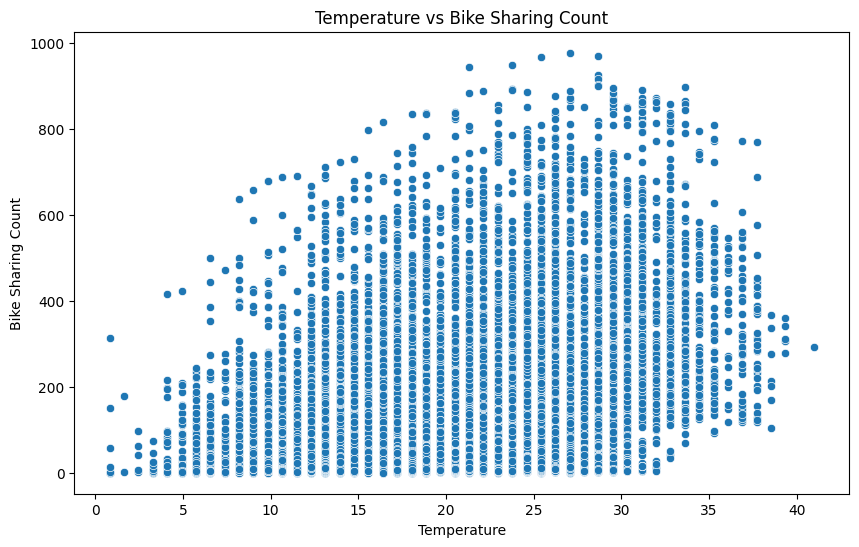

In [11]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='count', data=bikes)
plt.title('Temperature vs Bike Sharing Count')
plt.xlabel('Temperature')
plt.ylabel('Bike Sharing Count')
plt.show()

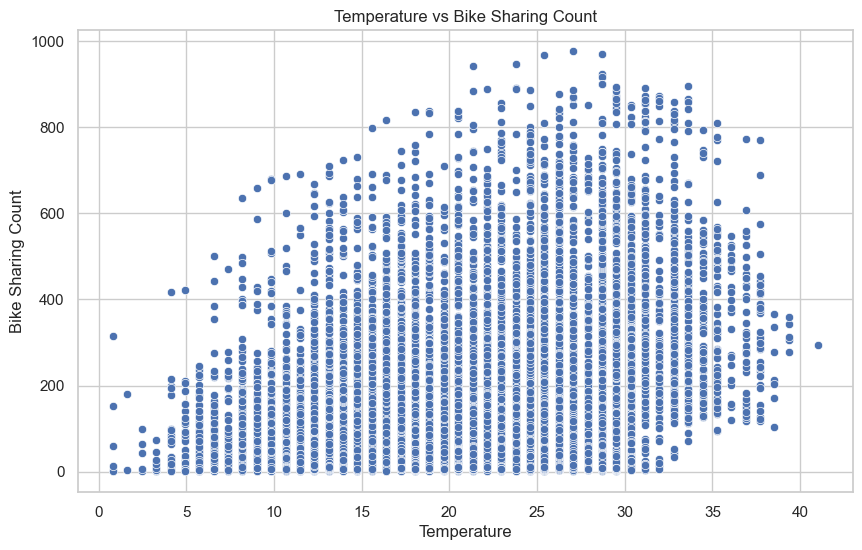

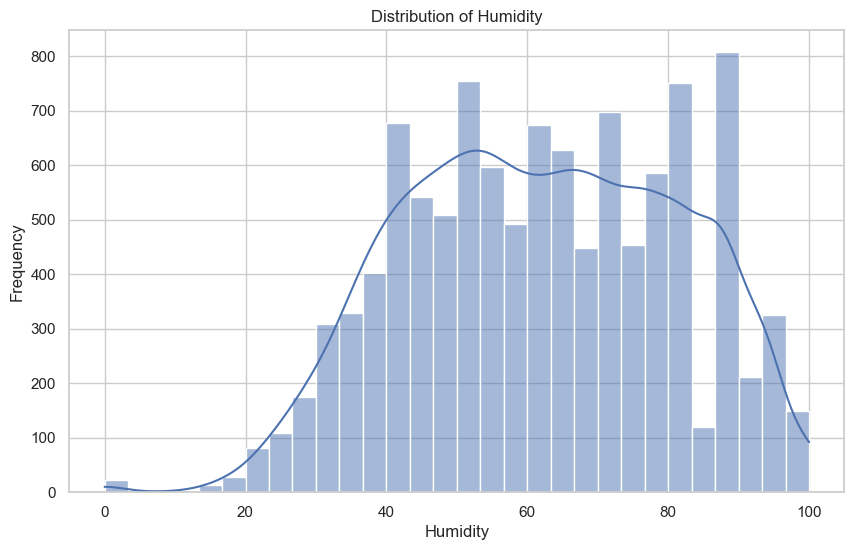

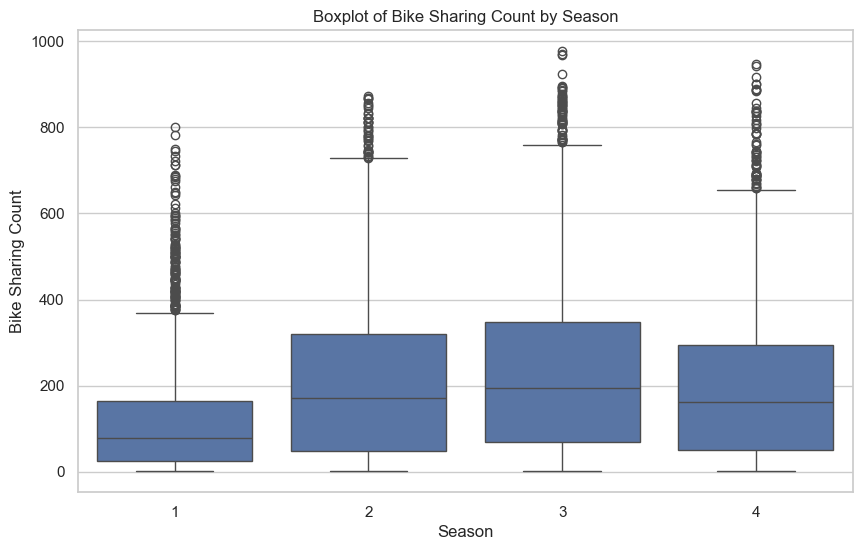

ValueError: could not convert string to float: '2011-01-01 00:00:00'

In [12]:
# Set plot style
sns.set(style="whitegrid")

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='count', data=bikes)
plt.title('Temperature vs Bike Sharing Count')
plt.xlabel('Temperature')
plt.ylabel('Bike Sharing Count')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(bikes['humidity'], bins=30, kde=True)
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=bikes)
plt.title('Boxplot of Bike Sharing Count by Season')
plt.xlabel('Season')
plt.ylabel('Bike Sharing Count')
plt.show()

# Heatmap
corr = bikes.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
### Feature Engineering

In [ ]:
# Convert categorical data to numeric
gender_le = LabelEncoder()
customer_type_le = LabelEncoder()
type_of_travel_le = LabelEncoder()
class_le = LabelEncoder()
satisfaction_le = LabelEncoder()

clean_data['Gender'] = gender_le.fit_transform(clean_data['Gender'])
clean_data['Customer Type'] = customer_type_le.fit_transform(clean_data['Customer Type'])
clean_data['Type of Travel'] = type_of_travel_le.fit_transform(clean_data['Type of Travel'])
clean_data['Class'] = class_le.fit_transform(clean_data['Class'])
clean_data['satisfaction'] = satisfaction_le.fit_transform(clean_data['satisfaction'])


In [ ]:
# One hot encoding
#手动编码

# Define the mappings for each categorical variable
gender_mapping = {'Female': 0, 'Male': 1}
customer_type_mapping = {'Loyal Customer': 1, 'disloyal Customer': 0}
type_of_travel_mapping = {'Business travel': 1, 'Personal Travel': 0}
class_mapping = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
satisfaction_mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}

# Apply the mappings to the dataset
clean_data['Gender'] = clean_data['Gender'].map(gender_mapping)
clean_data['Customer Type'] = clean_data['Customer Type'].map(customer_type_mapping)
clean_data['Type of Travel'] = clean_data['Type of Travel'].map(type_of_travel_mapping)
clean_data['Class'] = clean_data['Class'].map(class_mapping)
clean_data['satisfaction'] = clean_data['satisfaction'].map(satisfaction_mapping)

# Verify the transformation
print(clean_data.head())


In [ ]:
# demonstrate OHE
OneHotEncoder().fit_transform(bikes[['season', 'holiday', 'workingday']])

In [ ]:
### Modelling

In [13]:
# Define features and labels
X = bikes[['season', 'weather', 'temp', 'humidity', 'windspeed']]
y = bikes['count']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# demonstrate OHE
OneHotEncoder().fit_transform(bikes[['season', 'holiday', 'workingday']])

# Preprocessing and model pipeline
numeric_features = ['temp', 'humidity', 'windspeed']
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

categorical_features = ['season', 'weather']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.02


In [ ]:
## split data into X variables and y variable

X = final_data[['Customer Type', 'Age', 'Class', 'Leg room service', 'Checkin service',
        'Flight_Service', 'Online_Service', 'Baggage_Service',
       'Log_Flight_Distance']]
y = final_data['satisfaction']

In [ ]:
# reserve 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
# demonstrate what MinMaxScaler() does
MinMaxScaler().fit_transform(final_data[['Age','Log_Flight_Distance','Flight_Service', 'Online_Service', 'Baggage_Service']])


# demonstrate OHE
OneHotEncoder().fit_transform(bikes[['season', 'holiday', 'workingday']])


In [ ]:
# Define columns
numeric_columns = ['Age','Log_Flight_Distance','Flight_Service', 'Online_Service', 'Baggage_Service']
categorical_columns = ['Customer Type', 'Class']

In [ ]:
# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

In [ ]:
# we are going to test 4 models with cross validation to see which ones work best for this data
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()
rf = RandomForestClassifier(random_state=42)


In [ ]:
# cross validation to determine in general which model works best for the given problem
# 这里应该是可以改变scoring = ？来选择自己需要的东西
knn_scores = cross_val_score(knn, X_train, y_train, scoring='f1', cv=5)
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='f1', cv=5)
nb_scores = cross_val_score(nb, X_train, y_train, scoring='f1', cv=5)
rf_scores = cross_val_score(rf, X_train, y_train, scoring='f1', cv=5)

In [ ]:
print(np.mean(knn_scores))
print(np.mean(logreg_scores))
print(np.mean(nb_scores))
print(np.mean(rf_scores))

In [ ]:
# Define scoring functions
scoring = {'accuracy': make_scorer(accuracy_score), 
           'recall': make_scorer(recall_score),
           'precision': make_scorer(precision_score),
           'f1': 'f1'}

In [ ]:
# Cross-validation evaluation for KNN model
knn_scores = cross_validate(knn, X_train, y_train, scoring=scoring, cv=5)
knn_accuracy = np.mean(knn_scores['test_accuracy'])
knn_recall = np.mean(knn_scores['test_recall'])
knn_precision = np.mean(knn_scores['test_precision'])
knn_f1 = np.mean(knn_scores['test_f1'])

# Cross-validation evaluation for Logistic Regression model
logreg_scores = cross_validate(logreg, X_train, y_train, scoring=scoring, cv=5)
logreg_accuracy = np.mean(logreg_scores['test_accuracy'])
logreg_recall = np.mean(logreg_scores['test_recall'])
logreg_precision = np.mean(logreg_scores['test_precision'])
logreg_f1 = np.mean(logreg_scores['test_f1'])

# Cross-validation evaluation for Naive Bayes model
nb_scores = cross_validate(nb, X_train, y_train, scoring=scoring, cv=5)
nb_accuracy = np.mean(nb_scores['test_accuracy'])
nb_recall = np.mean(nb_scores['test_recall'])
nb_precision = np.mean(nb_scores['test_precision'])
nb_f1 = np.mean(nb_scores['test_f1'])

# Cross-validation evaluation for Random Forest model
rf_scores = cross_validate(rf, X_train, y_train, scoring=scoring, cv=5)
rf_accuracy = np.mean(rf_scores['test_accuracy'])
rf_recall = np.mean(rf_scores['test_recall'])
rf_precision = np.mean(rf_scores['test_precision'])
rf_f1 = np.mean(rf_scores['test_f1'])

In [ ]:
print(f"Random Forest Mean Accuracy: {rf_accuracy}")
print(f"Random Forest Mean Recall: {rf_recall}")
print(f"Random Forest Mean Precision: {rf_precision}")
print(f"Random Forest Mean F1 Score: {rf_f1}")
print(f"KNN Mean Accuracy: {knn_accuracy}")
print(f"KNN Mean Recall: {knn_recall}")
print(f"KNN Mean Precision: {knn_precision}")
print(f"KNN Mean F1 Score: {knn_f1}")
print(f"Logistic Regression Mean Accuracy: {logreg_accuracy}")
print(f"Logistic Regression Mean Recall: {logreg_recall}")
print(f"Logistic Regression Mean Precision: {logreg_precision}")
print(f"Logistic Regression Mean F1 Score: {logreg_f1}")
print(f"Naive Bayes Mean Accuracy: {nb_accuracy}")
print(f"Naive Bayes Mean Recall: {nb_recall}")
print(f"Naive Bayes Mean Precision: {nb_precision}")
print(f"Naive Bayes Mean F1 Score: {nb_f1}")

In [ ]:
# build our pipeline
pipeline = Pipeline(steps=
                    [
                        ('preprocessor',preprocessor),
                        ('classifier',KNeighborsClassifier())
                    ])

In [ ]:
# a quick side-quest demo of how KNN works
knn_15 = KNeighborsClassifier(n_neighbors=15).fit(X_train,y_train)
pred_15 = knn_15.predict(X_test)
print(accuracy_score(y_test, pred_15))
print(f1_score(y_test, pred_15))
print(precision_score(y_test, pred_15))
print(recall_score(y_test, pred_15))

# a quick side-quest demo of how KNN works
knn_30 = KNeighborsClassifier(n_neighbors=30).fit(X_train,y_train)
pred_30 = knn_30.predict(X_test)
print(accuracy_score(y_test, pred_30))
print(f1_score(y_test, pred_30))
print(precision_score(y_test, pred_30))
print(recall_score(y_test, pred_30))

In [ ]:
###### 我自己用code

In [ ]:
## Random Forest

In [ ]:
# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline with a preprocessor and Random Forest model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_pipeline.predict(X_test)

In [ ]:
# Create a pipeline with a preprocessor and Random Forest model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for Random Forest:", grid_search.best_params_)

In [ ]:
# Build the final Random Forest model using the best hyperparameters
final_classifier = RandomForestClassifier(
    n_estimators=grid_search.best_params_['classifier__n_estimators'],
    max_depth=grid_search.best_params_['classifier__max_depth'],
    min_samples_split=grid_search.best_params_['classifier__min_samples_split'],
    min_samples_leaf=grid_search.best_params_['classifier__min_samples_leaf'],
    random_state=42
)

# Build the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_classifier)
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict on the test set
pred = final_pipeline.predict(X_test)
probs = final_pipeline.predict_proba(X_test)

# Evaluate model performance
test_accuracy = accuracy_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
test_precision = precision_score(y_test, pred)
test_recall = recall_score(y_test, pred)

print(f"Final Model Test Accuracy: {test_accuracy}")
print(f"Final Model Test F1 Score: {test_f1}")
print(f"Final Model Test Precision: {test_precision}")
print(f"Final Model Test Recall: {test_recall}")

In [ ]:
# Calculate ROC curve and AUC score
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
## KNN 

In [ ]:
# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


# Create a pipeline with a preprocessor and KNN model
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Predict on the test set
y_pred = knn_model.predict(X_test)

In [ ]:
# Create a pipeline with a preprocessor and KNN model
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])


# Define hyperparameter grid
param_grid = {
    'classifier__n_neighbors': [5, 7, 9, 15, 35, 45, 55],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for KNN:", grid_search.best_params_)

In [ ]:
# Build the final KNN model using the best hyperparameters
final_classifier = KNeighborsClassifier(
    n_neighbors=grid_search.best_params_['classifier__n_neighbors'],
    metric=grid_search.best_params_['classifier__metric'],
    weights=grid_search.best_params_['classifier__weights']
)

# Build the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_classifier)
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict on the test set
pred = final_pipeline.predict(X_test)
probs = final_pipeline.predict_proba(X_test)

# Evaluate model performance
test_accuracy = accuracy_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
test_precision = precision_score(y_test, pred)
test_recall = recall_score(y_test, pred)

print(f"Final Model Test Accuracy: {test_accuracy}")
print(f"Final Model Test F1 Score: {test_f1}")
print(f"Final Model Test Precision: {test_precision}")
print(f"Final Model Test Recall: {test_recall}")

In [ ]:
# Calculate ROC curve and AUC score
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
## Logistic Regression 

In [ ]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Create a pipeline with a preprocessor and Logistic Regression model
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg)
])

# Define the hyperparameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__solver': ['saga']  # saga solver supports l1, l2, and elasticnet
}


# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)


# Output the best hyperparameter combination
print("Best hyperparameters for Logistic Regression:", grid_search.best_params_)

In [ ]:
# Build the final Logistic Regression model using the best hyperparameters
final_classifier = LogisticRegression(
    C=grid_search.best_params_['classifier__C'],
    penalty=grid_search.best_params_['classifier__penalty'],
    solver=grid_search.best_params_['classifier__solver'],
    max_iter=1000
)

# Build the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_classifier)
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict on the test set
pred = final_pipeline.predict(X_test)
probs = final_pipeline.predict_proba(X_test)

# Evaluate model performance
test_accuracy = accuracy_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
test_precision = precision_score(y_test, pred)
test_recall = recall_score(y_test, pred)

print(f"Final Model Test Accuracy: {test_accuracy}")
print(f"Final Model Test F1 Score: {test_f1}")
print(f"Final Model Test Precision: {test_precision}")
print(f"Final Model Test Recall: {test_recall}")

In [ ]:
# Calculate ROC curve and AUC score
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()


In [ ]:
## Naive Bayes 

In [ ]:
# Define the Naive Bayes model
nb_model = GaussianNB()

# Create a pipeline with a preprocessor and Naive Bayes model
nb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', nb_model)
])


# Define the hyperparameter grid
param_grid = {
    'classifier__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
}


# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(nb_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for Naive Bayes:", grid_search.best_params_)



In [ ]:
# Build the final Naive Bayes model using the best hyperparameters
final_classifier = GaussianNB(var_smoothing=grid_search.best_params_['classifier__var_smoothing'])

# Build the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_classifier)
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict on the test set
pred = final_pipeline.predict(X_test)
probs = final_pipeline.predict_proba(X_test)

# Evaluate model performance
test_accuracy = accuracy_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
test_precision = precision_score(y_test, pred)
test_recall = recall_score(y_test, pred)

print(f"Final Model Test Accuracy: {test_accuracy}")
print(f"Final Model Test F1 Score: {test_f1}")
print(f"Final Model Test Precision: {test_precision}")
print(f"Final Model Test Recall: {test_recall}")

In [ ]:
# Calculate ROC curve and AUC score
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()